In [94]:
import os
import sys
import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

sys.path.append(os.getcwd() + "/../")

from bfcnn.utilities import \
    stats_2d_block, \
    mean_sigma_local, \
    mean_sigma_global

In [95]:
# setup environment
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
tf.compat.v1.enable_eager_execution
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [96]:
# setup variables

INPUT_SHAPE = (None, None, 1)

IMAGE_PATH = "../images/test/etc/lena.jpg"

In [97]:
# create input for pyramids
x = \
    tf.keras.preprocessing.image.load_img(
        path=IMAGE_PATH,
        color_mode="grayscale",
        target_size=(256, 256))

x = tf.keras.preprocessing.image.img_to_array(x)
x = np.array([x])
x = ((x / 255.0) * 2.0) - 1.0

In [98]:
x_mean_global, x_sigma_global = \
    mean_sigma_global(
        input_layer=x,
        axis=[1, 2])

x_mean_local, x_sigma_local = \
    mean_sigma_local(
        input_layer=x,
        kernel_size=(11, 11))

x_new = x
x_new_global = (x_new - x_mean_global) / x_sigma_global
x_new_local = (x_new - x_mean_local) / x_sigma_local

Text(0.5, 1.0, 'x_new_local')

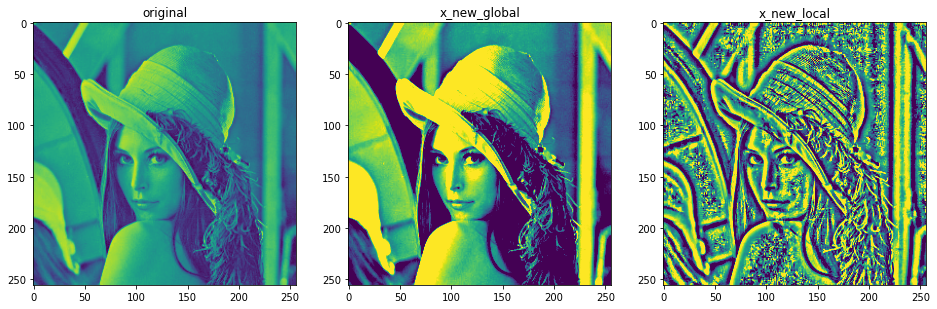

In [99]:
norm = plt.Normalize(-1,+1)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,8))
# ---
im = axes[0].imshow(x[0,:,:,0], norm=norm)
axes[0].set_title(f"original")
# ---
im = axes[1].imshow(x_new_global[0,:,:,0], norm=norm)
axes[1].set_title(f"x_new_global")
# ---
im = axes[2].imshow(x_new_local[0,:,:,0], norm=norm)
axes[2].set_title(f"x_new_local")

Text(0.5, 1.0, 'x_sigma_local')

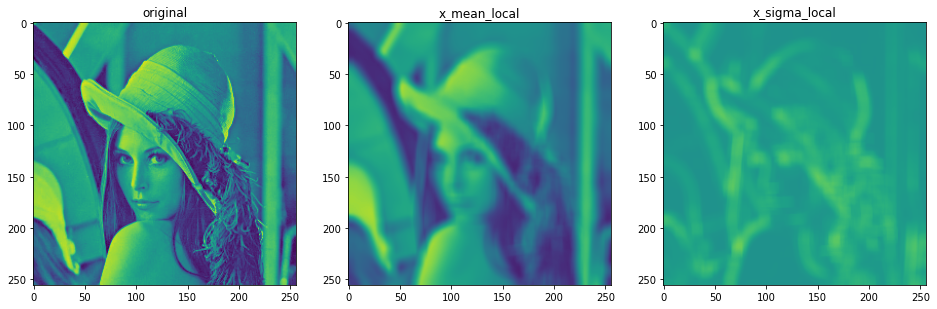

In [100]:
norm = plt.Normalize(-1,+1)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,8))
# ---
im = axes[0].imshow(x[0,:,:,0], norm=norm)
axes[0].set_title(f"original")
# ---
im = axes[1].imshow(x_mean_local[0,:,:,0], norm=norm)
axes[1].set_title(f"x_mean_local")
# ---
im = axes[2].imshow(x_sigma_local[0,:,:,0], norm=norm)
axes[2].set_title(f"x_sigma_local")

Text(0.5, 1.0, 'x_sigma_local_21')

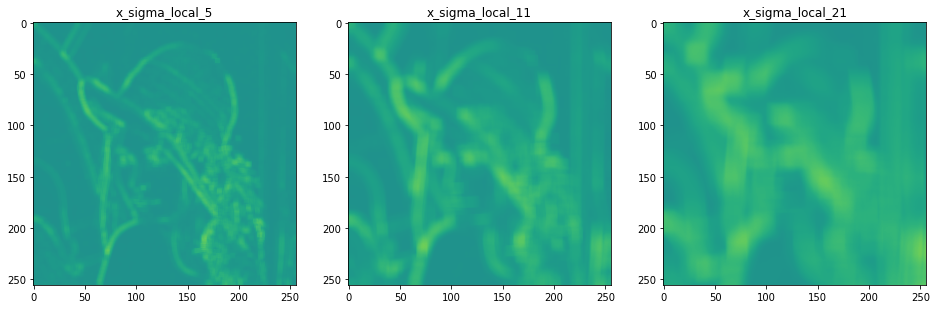

In [101]:
_, x_sigma_local_5 = \
    mean_sigma_local(
        input_layer=x,
        kernel_size=(5, 5))
_, x_sigma_local_11 = \
    mean_sigma_local(
        input_layer=x,
        kernel_size=(11, 11))
_, x_sigma_local_21 = \
    mean_sigma_local(
        input_layer=x,
        kernel_size=(21, 21))
norm = plt.Normalize(-1,+1)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,8))
# ---
im = axes[0].imshow(x_sigma_local_5[0,:,:,0], norm=norm)
axes[0].set_title(f"x_sigma_local_5")
# ---
im = axes[1].imshow(x_sigma_local_11[0,:,:,0], norm=norm)
axes[1].set_title(f"x_sigma_local_11")
# ---
im = axes[2].imshow(x_sigma_local_21[0,:,:,0], norm=norm)
axes[2].set_title(f"x_sigma_local_21")
